In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
M=nx.read_gml("polblogs.gml")

In [28]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

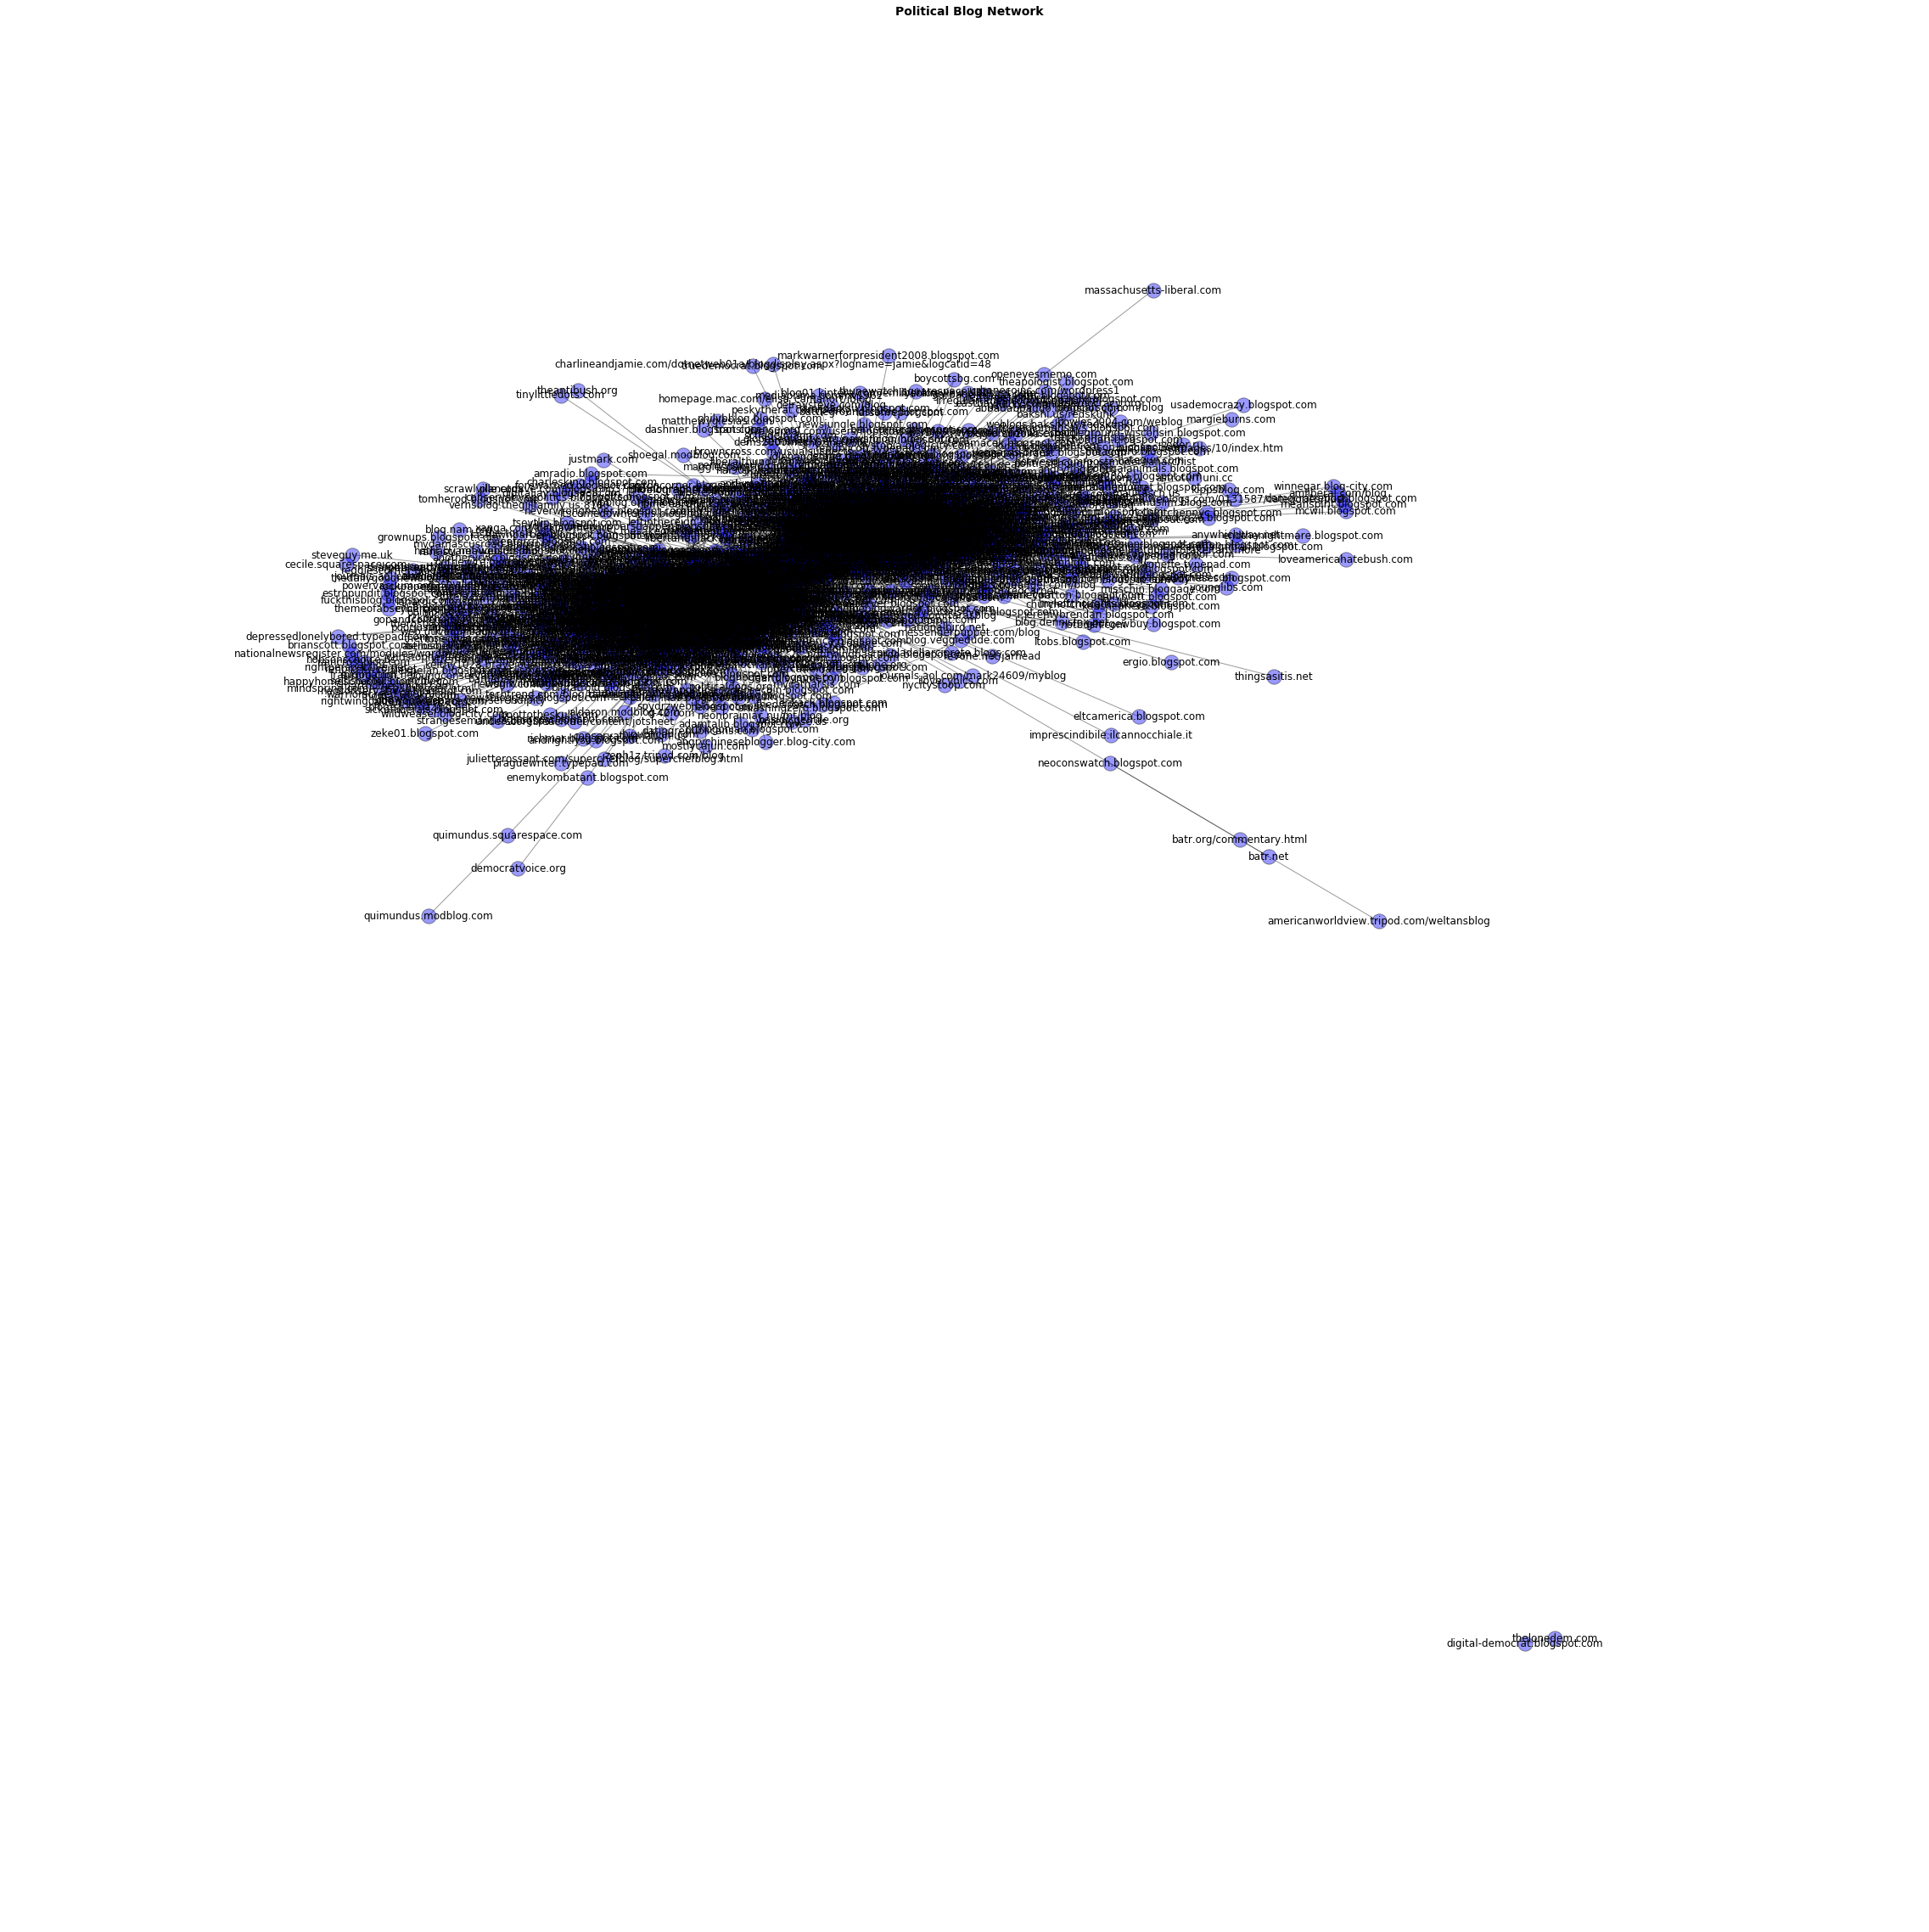

In [29]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
centrality=nx.eigenvector_centrality(G)

In [7]:

blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = person_list.sort(key=lambda x: x[1])

In [15]:
most_influ_blog = sorted(person_list, key=lambda x: x[1], reverse=True)

In [17]:
most_influ_blog[:10]

[(u'atrios.blogspot.com', 0.19480797936637712),
 (u'dailykos.com', 0.16089740205234834),
 (u'washingtonmonthly.com', 0.14653924259836884),
 (u'digbysblog.blogspot.com', 0.14264369221718315),
 (u'bodyandsoul.typepad.com', 0.14113489174330365),
 (u'liberaloasis.com', 0.13952371571107874),
 (u'tbogg.blogspot.com', 0.1370364169982426),
 (u'corrente.blogspot.com', 0.1294175927409615),
 (u'talkingpointsmemo.com', 0.12700519780790953),
 (u'dneiwert.blogspot.com', 0.12237564692546021)]

### 3.  What are the 10 least influential blogs?



In [18]:
least_influ_blog = sorted(person_list, key=lambda x: x[1])

In [19]:
least_influ_blog[:10]

[(u'thelonedem.com', 1.776325109755966e-72),
 (u'digital-democrat.blogspot.com', 1.776325109755966e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916243e-09),
 (u'quimundus.modblog.com', 6.682929975006485e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.796325594929459e-07),
 (u'democratvoice.org', 1.0233388204113302e-06),
 (u'quimundus.squarespace.com', 6.061741218869533e-06),
 (u'massachusetts-liberal.com', 9.483365235734506e-06),
 (u'thingsasitis.net', 1.173624965065861e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)